In [1]:
# 데이터 가져오기
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


In [2]:
# 모델에 입력할 데이터 X 준비하기
# 모델에 예측할 데이터 y 준비하기
df_x = diabetes.data
df_y = diabetes.target

print(df_x.shape)
print(df_y.shape)
# TODO 추가로 필요한 것이 있는가?? 체크 -> 확인 결과 없음

X = df_x;
y = df_y;

(442, 10)
(442,)


In [3]:
# train 데이터와 test 데이터로 분리하기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 모델 준비하기
#age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'

W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [5]:
# 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [6]:
# 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [7]:
# 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.077


Iteration 100 : Loss 5517.4081
Iteration 200 : Loss 5088.8832
Iteration 300 : Loss 4749.1742
Iteration 400 : Loss 4477.9005
Iteration 500 : Loss 4259.5318
Iteration 600 : Loss 4082.2190
Iteration 700 : Loss 3936.9089
Iteration 800 : Loss 3816.6723
Iteration 900 : Loss 3716.1950
Iteration 1000 : Loss 3631.3913
Iteration 1100 : Loss 3559.1113
Iteration 1200 : Loss 3496.9180
Iteration 1300 : Loss 3442.9186
Iteration 1400 : Loss 3395.6368
Iteration 1500 : Loss 3353.9145
Iteration 1600 : Loss 3316.8384
Iteration 1700 : Loss 3283.6830
Iteration 1800 : Loss 3253.8682
Iteration 1900 : Loss 3226.9263
Iteration 2000 : Loss 3202.4767
Iteration 2100 : Loss 3180.2073
Iteration 2200 : Loss 3159.8596
Iteration 2300 : Loss 3141.2171
Iteration 2400 : Loss 3124.0975
Iteration 2500 : Loss 3108.3449
Iteration 2600 : Loss 3093.8255
Iteration 2700 : Loss 3080.4231
Iteration 2800 : Loss 3068.0363
Iteration 2900 : Loss 3056.5754
Iteration 3000 : Loss 3045.9611


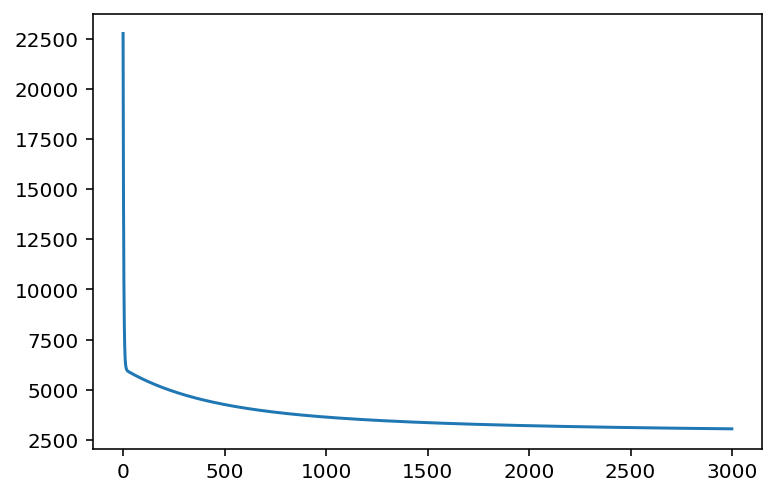

In [8]:
# 모델 학습하기

losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

In [9]:
# test 데이터에 대한 성능 확인하기

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2889.722822519482

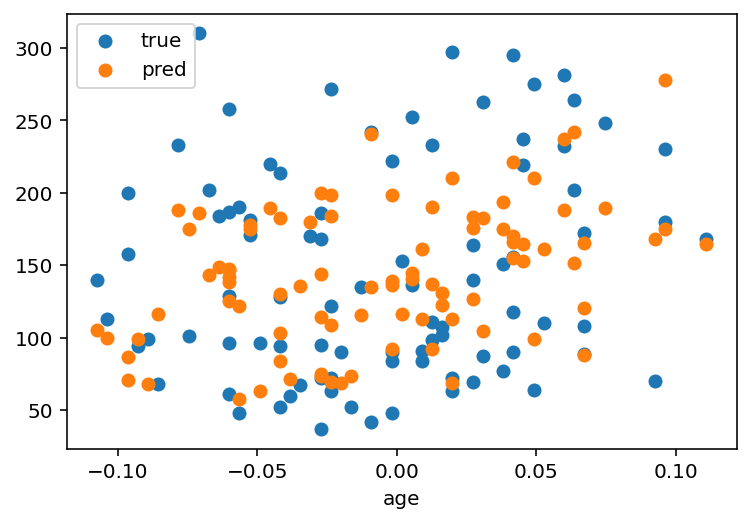

In [10]:
# 정답 데이터와 예측한 데이터 시각화하기
''' 모든 항목 시각화 확인
for i in range(10):
    plt.scatter(X_test[:, i], y_test, label="true")
    plt.scatter(X_test[:, i], prediction, label="pred")
    plt.xlabel(diabetes.feature_names[i])
    plt.legend()
    plt.show()
'''
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.xlabel(diabetes.feature_names[0])
plt.legend()
plt.show()